In [1]:
# Comment the following lines if you're not in colab:
from google.colab import drive
drive.mount('/content/drive')
# If you're in colab, cd to your own working directory here:
%cd ..//..//content//drive//MyDrive//Colab-Notebooks//HY-673-Tutorials//Tutorial-3

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab-Notebooks/HY-673-Tutorials/Tutorial-3


A Gaussian Mixture Model (GMM) is a probabilistic model that assumes all the data points are generated from a mixture Gaussian distributions with unknown parameters (mean and std). GMMs are used for clustering, density estimation, and as a component in more complex models. See the course's theory for more details. <br>
https://i.makeagif.com/media/10-22-2016/B84_6x.gif <br>
In this notebook, we'll see how to use `sklearn`'s GMM implementation, and in the next notebook we'll dive into more details and do it without `sklearn`.

We'll work with the famous MNIST dataset (https://en.wikipedia.org/wiki/MNIST_database) which has greyscale images of handwritten digits. With PyTorch we can simply import it:

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor

from sklearn.mixture import GaussianMixture

And download it easily:

In [3]:
datapath = 'data'

dataset = MNIST(
    root = datapath,
    train = False,
    transform = ToTensor(),
    download=True
)

Let us select only use the images that correspond to one digit of our choice:

In [4]:
digit = 4
x_data = np.asarray([image.numpy() for image, label in dataset if label==digit])
x1, y1 = x_data.shape[2], x_data.shape[3]
print(f"We have a total of {x_data.shape[0]} images for the digit '{digit}', each of shape {x1, y1}.")

We have a total of 982 images for the digit '4', each of shape (28, 28).


Visualizing what a sample looks like:

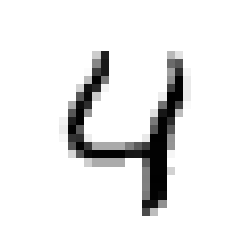

In [5]:
figsize_ = (3,3)
plt.figure(figsize=figsize_)
plt.imshow(x_data[0, 0], cmap='binary')
plt.axis("off")
plt.show()
plt.close()

For the GMM of `sklearn` library to work, we need our dataset to be <= 2D. Hence, we will **flatten** the images in our dataset:

In [6]:
x_data = x_data.reshape(-1, x1*y1)
print(f"We have a total of {x_data.shape[0]} images for the digit '{digit}', each of shape {x1}*{y1} = {x_data.shape[1]}.")

We have a total of 982 images for the digit '4', each of shape 28*28 = 784.


We can create a GMM object from the `sklearn` library using the `GaussianMixture` class, by defining the number of mixture components and number of EM iterations to perform. Next, we can just call `gmm.fit()` in order for it to fit our dataset of '4's:

In [7]:
em_iters = 100
num_components = 20
seed = 42
np.random.seed(seed)

gmm = GaussianMixture(
    n_components=num_components,
    random_state=seed,
    max_iter=em_iters
)

gmm.fit(x_data)

GaussianMixture(n_components=20, random_state=42)

Now we can sample our GMM by calling `gmm.sample()`:

In [8]:
num_samples = 4
x_sample, y_sample = gmm.sample(num_samples)
x_sample = np.asarray(x_sample)
print(f"We sampled {x_sample.shape[0]} images of shape {x_sample.shape[1]} from our GMM.")

We sampled 4 images of shape 784 from our GMM.


In the context of greyscale images, pixels have values in $[0, 2^8-1 = 255]$ and represent shades of gray, with values closer to $0$ being darker and values closer to $255$ being lighter. In case we get negative values from our model, we can set them to $0$ (black), and reshape back to 2D in order to visualize them:

In [9]:
x_sample[x_sample < 0] = 0
x_sample = x_sample.reshape(-1, x1, y1)
print(f"We changed these {x_sample.shape[0]} images into shape {x_sample.shape[1], x_sample.shape[2]}.")

We changed these 4 images into shape (28, 28).


Finally, let's see what they look like:

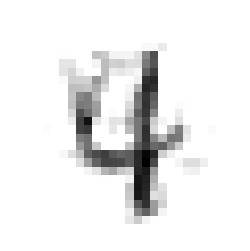

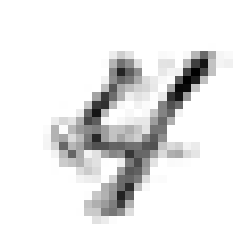

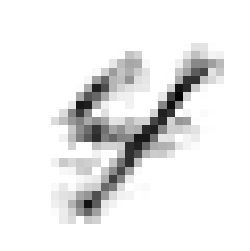

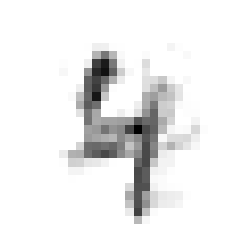

In [10]:
for image in x_sample:
    plt.figure(figsize=figsize_)
    plt.imshow(image, cmap='binary')
    plt.axis("off")
    plt.show()
    plt.close()

<u>Homework (optional)</u>

- See how it performs on other digits.
- Achieve better samples.